<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-кода" data-toc-modified-id="Подготовка-кода-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка кода</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Теоретическое-обоснование" data-toc-modified-id="Теоретическое-обоснование-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Теоретическое обоснование</a></span><ul class="toc-item"><li><span><a href="#Формулировка-задачи-обучения" data-toc-modified-id="Формулировка-задачи-обучения-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Формулировка задачи обучения</a></span></li><li><span><a href="#Решение-задачи-для-матрицы-признаков" data-toc-modified-id="Решение-задачи-для-матрицы-признаков-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Решение задачи для матрицы признаков</a></span></li><li><span><a href="#Решение-задачи-для-произведения-матриц" data-toc-modified-id="Решение-задачи-для-произведения-матриц-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Решение задачи для произведения матриц</a></span></li><li><span><a href="#Сравнение-вариантов-умножения-матриц" data-toc-modified-id="Сравнение-вариантов-умножения-матриц-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Сравнение вариантов умножения матриц</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Наша задача разработать метод защиты данных клиентов, такой, чтобы:
- по преобразованным данным было сложно восстановить персональную информацию. 
- при преобразовании качесво моделей машинного обучения не ухудшилось.

Требуется обосновать корректность работы метода преобразования. Проверку работы медота сделаем для алгоритма линейной регресии. 

Подбор наилучшей модели в границы проекта не входит. 

## Подготовка кода

### Загрузка библиотек

In [3]:
from os import path

import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns

## Загрузка данных

In [5]:
data_remote_url = 'https://code.s3.yandex.net/datasets/insurance.csv'
data_local_path = path.join('.', 'data', 'insurance.csv')

if path.isfile(data_local_path):
    data = pd.read_csv(data_local_path, index_col=0)
else:
    data = pd.read_csv(data_remote_url)
    if path.exists(path.dirname(data_local_path)):
        data.to_csv(data_local_path)
        
data.shape

(5000, 5)

Мы загрузили датасет, содержащий 5000 строк и 5 столбцов.

### Обзор данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 234.4 KB


От закзачика мы значем, что в датасете должны быть:
- признаки — это пол, возраст и зарплата застрахованного, количество членов его семьи.
- целевой признак — количество страховых выплат клиенту за последние 5 лет.

Мы видим, что загржуенный датасет содержит признаки и целевой признак, данные не содержат пропусков, типы данных соответствуют смыслу признаков.

Проверим дубликаты.

In [7]:
data.duplicated().sum()

153

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(4847, 5)

Посмотрим на распределение значений.

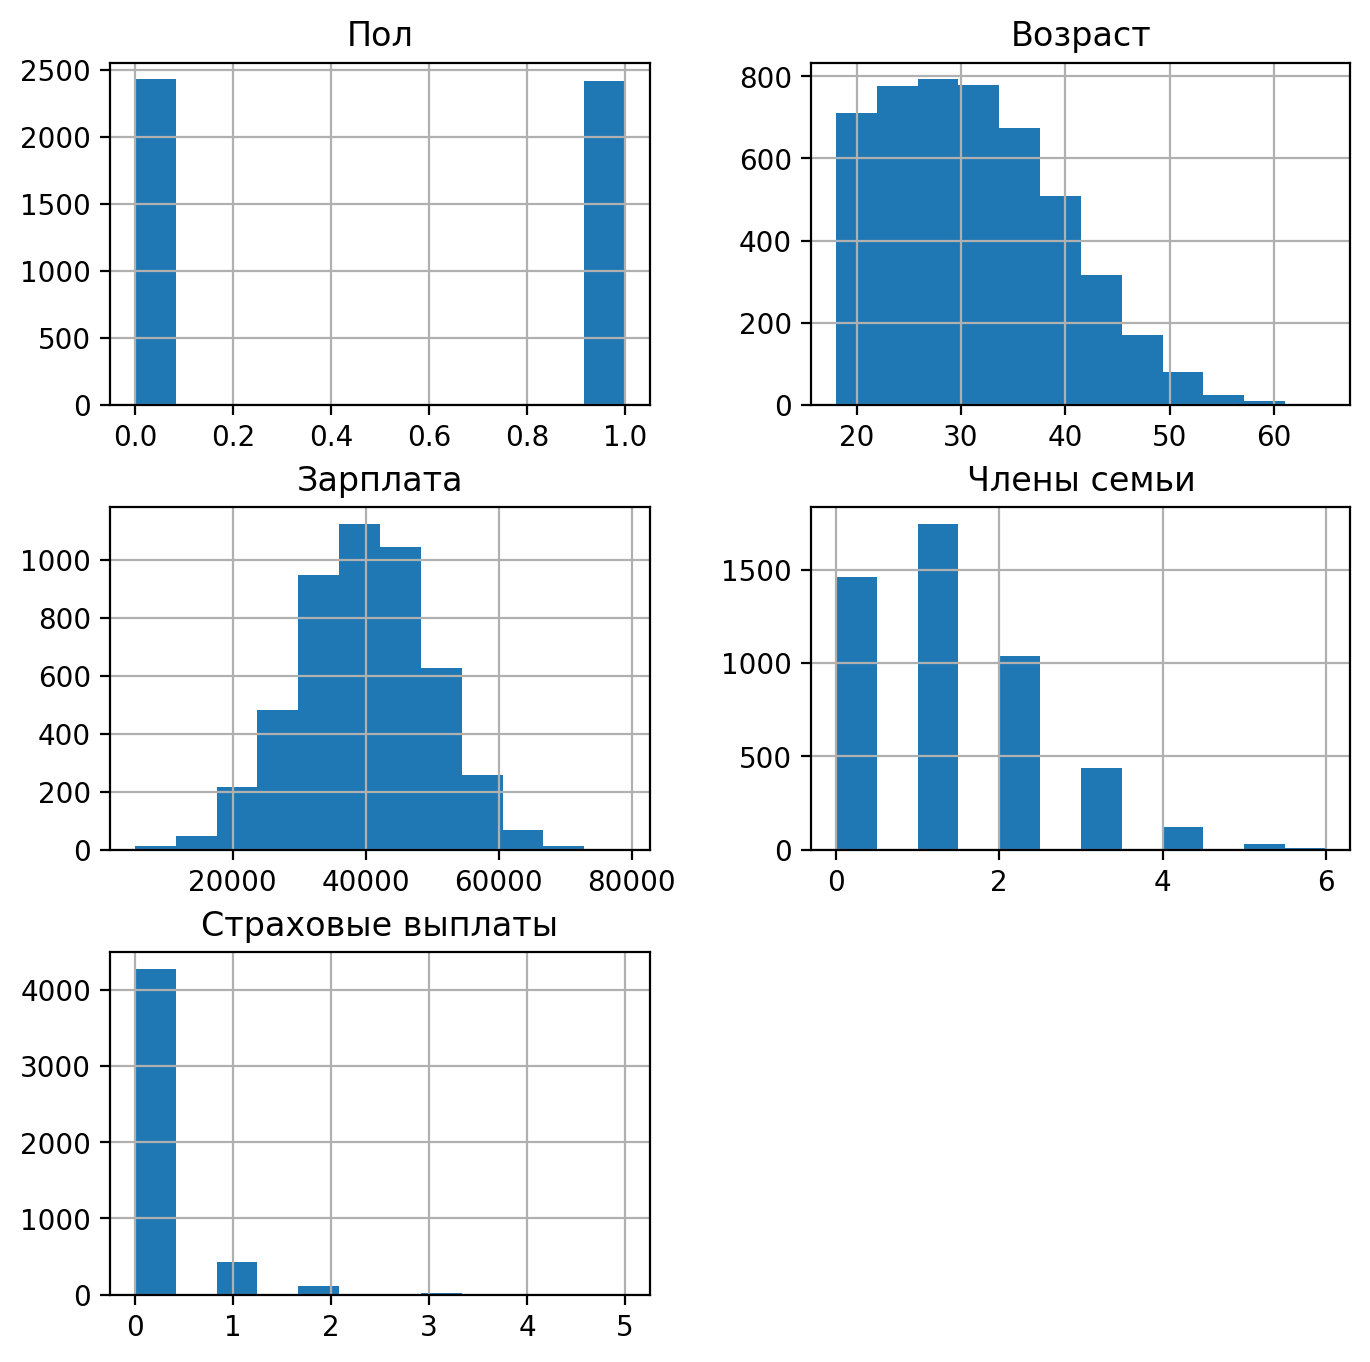

In [9]:
data.hist(bins=12, figsize=(8,8))
plt.show()

Видим, что: 
- пол является бинарным признаком;
- члены семьи и страховые выплаты — дискретный числовой признак;
- возраст и зарплата — непрерывные числовые признаки, значения возраста распределены.

Признаки не содержат выбросов, характер распределений значений соответствует смыслу признаков.

/home/dim/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dim/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dim/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/dim/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


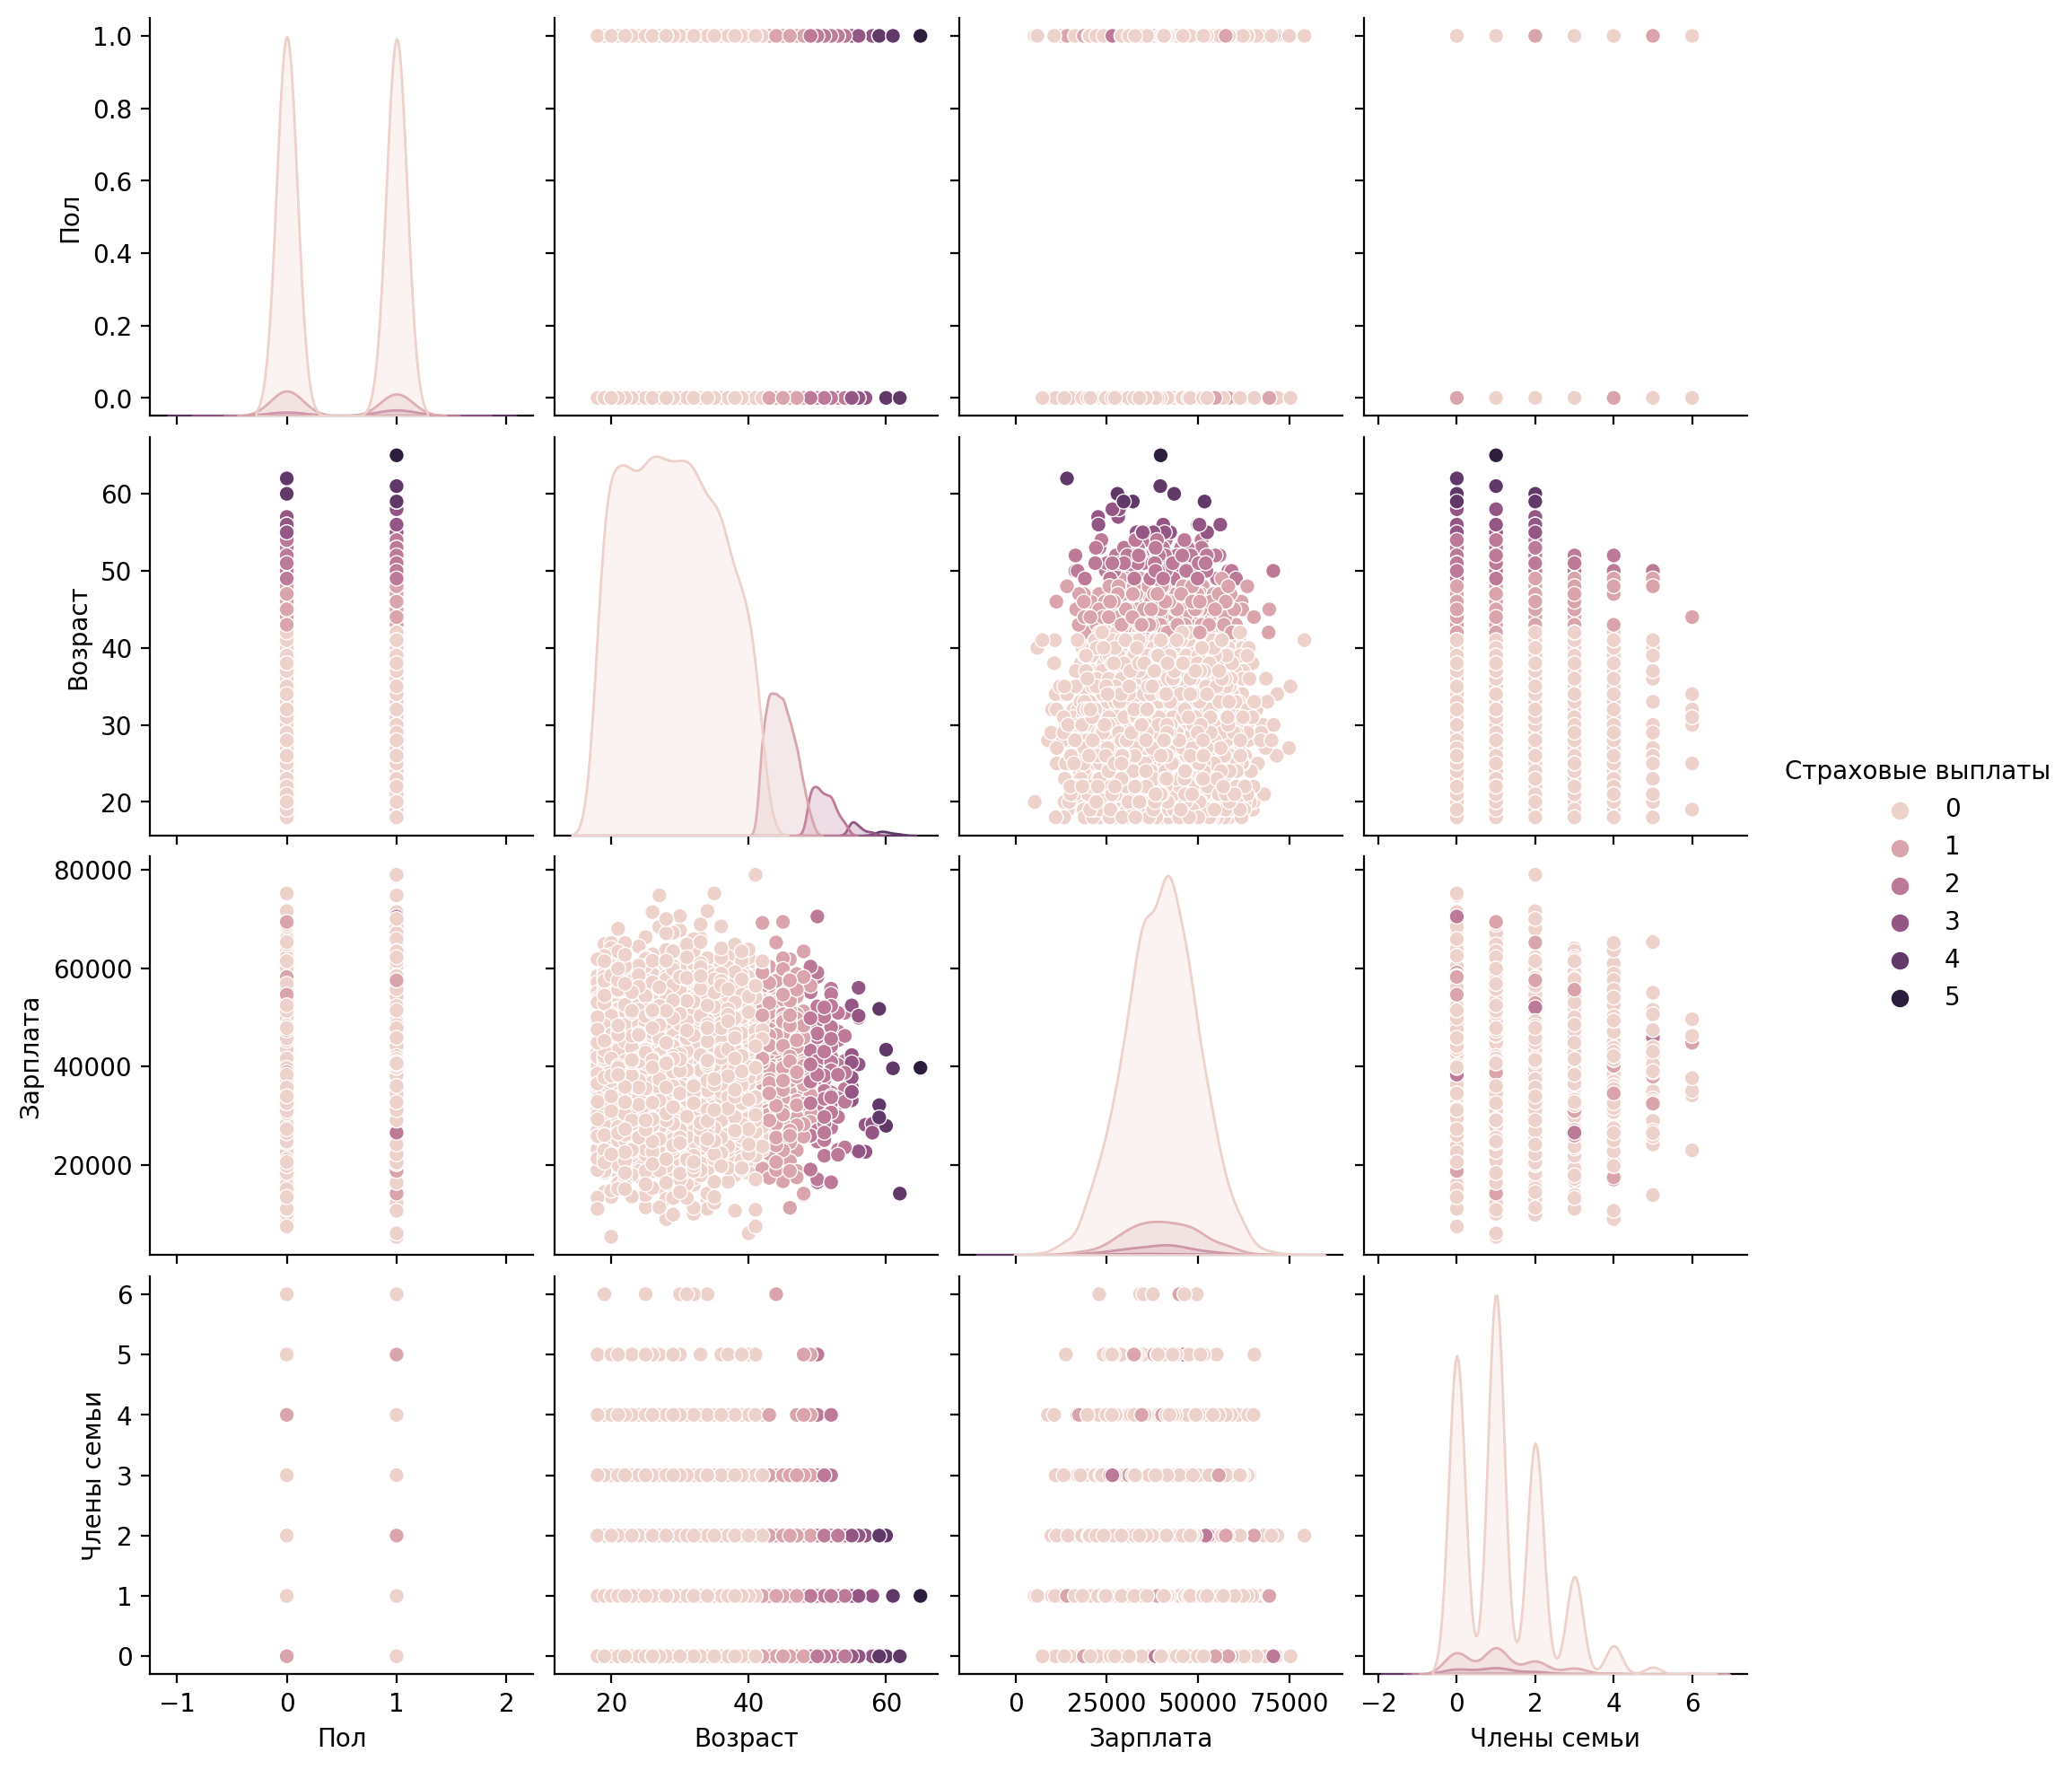

In [11]:
sns.pairplot(
    data, 
    hue='Страховые выплаты'
)

Мы видим, что между возрастом и количеством страховых выплат есть зависимость. 

### Вывод

Мы загрузили датасет, содержащий 5000 строк и 5 столбцов: 4 признака и 1 целевой признак.

В данных мы обнаружили дубликаты и удалили их. В значениях признаков мы не обнаружили ошибок. 

Мы видим связь целевого признака с признаком "возраст".

## Умножение матриц

Решим поставленную задачу с помощью линейной алгебры. Сначала решим задачу теоретически, затем проверим на практике.

### Теоретическое обоснование

В данной задаче мы рассматриваем алгоритм линейной регресии, который предполагает, что между независимыми переменными и зависимой переменной существует линейная зависимость. 

Введем обозначения:
- $k, k \in \mathbb{N}, k > 0$ — количество независимых переменных,
- $m, m \in \mathbb{N}, m > k$ — количество наблюдений,
- $n = k + 1$,
- $X, X \in \mathbb{R}^{m \times n}$ — матрица независимых переменных, у которой первый столбец содержит 1 для всех наблюдений,
- $y, y \in \mathbb{R}^m$ — вектор значений зависимой переменной,
- $w, w \in \mathbb{R}^n$ — вектор весов линейной регресии, нулевой элемент равен сдвигу.

Тогда, принимая, что между $X$ и $y$ есть линейная зависимость, определяемая вектором $w$, верно равенство:

$y = Xw$ 

#### Формулировка задачи обучения

Пусть $a \in \mathbb{R}^m$ — вектор предсказаний модели. 

Тогда предсказания определим как:

$a = Xw$

Задача обучения — найти такой вектор $w$, при котором средняя квадратичная ошибка минимальна:

$w = \arg\min_w \mathit{MSE}(Xw, y)$

Минимальное теоретическое значение $\mathit{MSE} = 0$, в нашем случае $\mathit{MSE}(Xw, y) = 0 \text{, если }  Xw = y$.

Значит нам надо найти такое $w$, при котором выполняется $Xw = y$

#### Решение задачи для матрицы признаков

Из равенства $Xw = y$ мы можем расчитать значения вектора $w$.

Умножим слева обе части уравнения на $X^T$, чтобы получить квадратную матрицу $X^T X$ размером $m \times m$

$X^T y = X^T X w$ 

Если квадратная матрица $(X^T X)$ обратима, то есть существует такая матрица $(X^T X)^{-1}$, что $(X^T X)^{-1} (X^T X) = E$, то умножим слева обе части уравнения на $(X^T X)^{-1}$ и получим

$(X^T X)^{-1} X^T y = (X^T X)^{-1} (X^T X) w = w$
    
Мы получили формулу обучения $w = (X^T X)^{-1} X^T y$

#### Решение задачи для произведения матриц

У нас стоит задача защитить значения $X$ от передачи сервису обучения и прогнозирования. 

Рассмотрим подход, когда мы умножаем значения $X$ на матрицу $P, P \in \mathbb{R}^{k \times l}$ перед отравкой в сервис обучения и прогнозирования. Поскольку умножение матриц не коммутативно, у нас может быть два варианта:

$y = (P X) w$

$y = (X P) w$

Мы знаем, что размер $X$ — $m \times n$, размер $w$ — $1 \times n$, размер $y$ — $1 \times m$, тогда размер $(P X)$ и $(X P)$ должен быть $m \times n$ и 
- в первом случае размер $P$ — $m \times m$
- во втором случае размер $P$ — $n \times n$

Обозначим произведение матриц $X$ и $P$ как $Q$.

Тогда имеем уравнение

$y = Qw$,

которое решаем аналогичным для $y = Xw$ и получаем 

$w = (Q^T Q)^{-1} Q^T y$, 

где $Q = PX, P \in \mathbb{R}^{m \times m}$ или $Q = XP, P \in \mathbb{R}^{n \times n}$

#### Сравнение вариантов умножения матриц

Таким образом мы показали, что если мы умножим матрицу $X$ на матрицу $P$, и если произведение матриц будет обратимым, то мы можем решить уравнение для произведения матриц тем же способом, что и для матрицы признаков. 

Так мы доказали, что можем использовать произведение матриц для обучения и предсказаний с тем же результатом, что и для матрицы признаков.  

Мы можем умножить матрицу признаков $X$ как слева, так и справа. Оценим ресурсы.

Умножение матриц рамеров $m \times k$ на $k \times m$ стоит $ 2mnk $ flops. Тогда
- умножение слева $P X$ будет стоить $2 m m n = 2m^2n $
- умножение справа $X P$ будет стоить $2 m n n = 2mn^2 $

По условию $m \ge n$, тогда $2m^2n \ge 2mn^2$ и второй вариант — умножение справа — предпочтительный.

#### Вывод

Мы показали, что если между признаками и целевым признаком есть линейная зависимость, и обратимы матрицы $(X^T X)$ и матрицы $(Q^T Q)$, где $Q = X P$, и $X, Q \in \mathbb{R}^{m \times n}, P \in \mathbb{R}^{n \times n}$, то решение для вычисления коэффициентов линейной регрессии идентично для $X$ и $Q$, а значит мы можем использовать произведение матриц для обучения и прогнозирования, не раскрывая данных клиентов. 

## Алгоритм преобразования

**Алгоритм**

...

**Обоснование**

...

## Проверка алгоритма

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования